# Análise dos relatórios de licitações e contratos

#### UFPB - Universidade Federal da Paraíba
#### Gestão Pública
Autores: Bruno Souza da Costa e Cecília Lori de Medeiros Cruz  

bruno.souza@dcx.ufpb.br  
cecilia.medeiros@dcx.ufpb.br

### O que buscamos?
Serão realizadas diversas análises com a finalidade de representar melhor os dados e responder às seguintes questões:
- Qual a quantidade e porcentagem das licitações/contratos por subcategoria?
- Quais os 10 relatores que mais possuem licitações/contratos em sua responsabilidade?
- Quais os 10 setores com mais licitações/contratos?
- Como é a distribuição das licitações/contratos ao longo dos anos?
- Qual a quantidade e porcentagem das licitações/contratos por estágio?
- As licitações/contratos possuem alguma diferença em seu ano de entrada e o ano de exercício?

# 0 Criando e formatando o Dataset

In [240]:
#Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [241]:
tabela_tramita = pd.read_csv("Dados_Tramitas.csv")
pd.set_option("display.max_columns", None)

In [242]:
#Transformando a coluna "DATA ENTRADA" no formato de data padrão
tabela_tramita['DATA ENTRADA'] = pd.to_datetime(tabela_tramita['DATA ENTRADA'], format='mixed')

#Criando a coluna "ANO ENTRADA" contendo apenas os anos de entradas das licitações/contratos
tabela_tramita['ANO ENTRADA'] = tabela_tramita['DATA ENTRADA'].dt.to_period('Y')

#Convertendo a coluna "EXERCICIO" para o formato de número inteiro
tabela_tramita["EXERCÍCIO"] = tabela_tramita["EXERCÍCIO"].astype(int)

# 1. Quantidade de licitações/contratos por subcategoria

In [243]:
#Conta todas as licitações/contratos cada subcategoria possui
relatorios_por_subcategorias = tabela_tramita['SUBCATEGORIA'].value_counts()
#Transforma o resultado obtido em um dataframe pandas
relatorios_por_subcategorias = relatorios_por_subcategorias.to_frame()
#Cria a coluna Relatórios por subcategoria
relatorios_por_subcategorias.columns = ['Relatórios por subcategoria']

#Soma o total de cada subcategoria pelo total de licitações/contratos
total_relatorios = relatorios_por_subcategorias['Relatórios por subcategoria'].sum()
#Calcula a porcentagem que cada subcategoria infere no total dos dados
relatorios_por_subcategorias['Porcentagem'] = ((relatorios_por_subcategorias['Relatórios por subcategoria'] / total_relatorios) * 100).round(2)

relatorios_por_subcategorias.to_excel("relatorios_por_subcategorias.xlsx", index=True)

#Exibe a tabela
relatorios_por_subcategorias

,Relatórios por subcategoria,Porcentagem
SUBCATEGORIA,,
Contrato,36277,43.19
Licitações,32224,38.36
Termo Aditivo,15351,18.28
Ordem de Serviço,99,0.12
Contratação Pública,46,0.05


# 2. Quais relatores possuem mais licitações/contratos

In [244]:
relatorios_por_relator = tabela_tramita['RELATOR'].value_counts()
relatorios_por_relator = relatorios_por_relator.to_frame()
relatorios_por_relator.columns = ['Relatórios por Relator']

relatorios_por_relator.to_excel("relatorios_por_relator.xlsx", index=True)

relatorios_por_relator.head(10)

,Relatórios por Relator
RELATOR,
Oscar Mamede Santiago Melo,3151
Conselheiro Arnóbio Alves Viana,2866
Conselheiro Substituto Antônio Cláudio Silva Santos,2558
Conselheiro André Carlo Torres Pontes,2536
Conselheiro Fernando Rodrigues Catão,2237
Conselheiro Substituto Antônio Gomes Vieira Filho,1949
Conselheiro Substituto Renato Sérgio Santiago Melo,1766
Conselheiro Antônio Nominando Diniz Filho,1534
Conselheiro Marcos Ubiratan Guedes Pereira,1436


# 3. Quais os setores com mais licitações/contratos

In [245]:
relatorios_por_setor = tabela_tramita['SETOR'].value_counts()
relatorios_por_setor = relatorios_por_setor.to_frame()
relatorios_por_setor.columns = ['Relatórios por setor']

relatorios_por_setor.to_excel("relatorios_por_setor.xlsx", index=True)

relatorios_por_setor.head(10)

,Relatórios por setor
SETOR,
ACERVO DIGITAL,47197
ARQUIVO,17809
ARQUIVO DIGITAL,14007
DIARQ,2884
AGVF,374
AAV,363
1CAM,293
APCL,279
FRC,117


# 4. Quantidade de licitações/contradas ao longo dos anos

## 4.1 Quantidade por ano de entrada

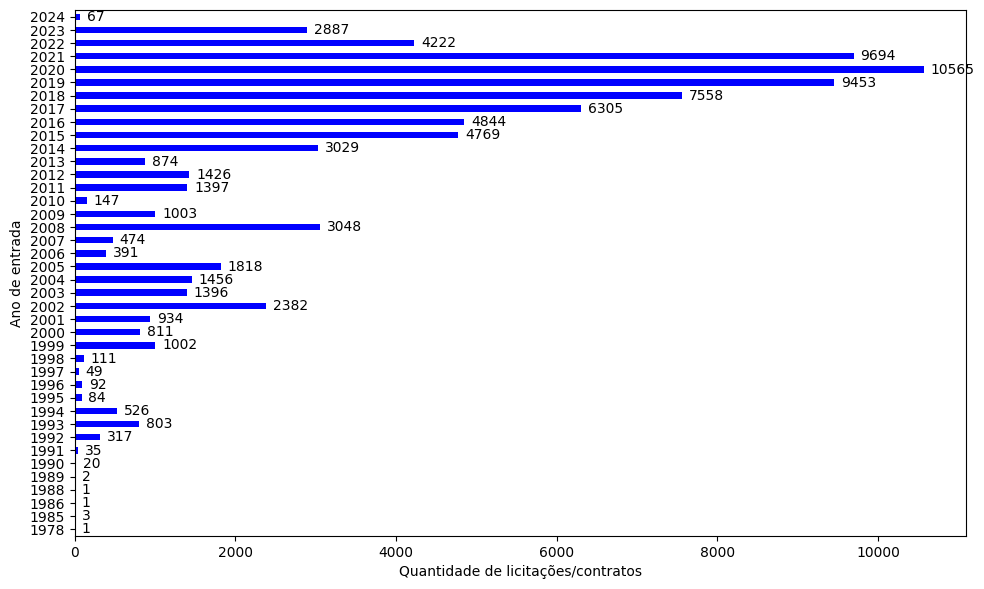

In [246]:
dados_2024_tramitas = tabela_tramita[tabela_tramita['ANO ENTRADA'] <= '2024']

dados_2024 = dados_2024_tramitas.groupby('ANO ENTRADA')['PROTOCOLO'].count()

fig, ax = plt.subplots(figsize=(10, 6))  # Ajuste o tamanho do gráfico para maior espaçamento geral
dados_2024.plot(kind='barh', ax=ax, color='Blue', ylabel="Ano de entrada", xlabel="Quantidade de licitações/contratos")

# Aumentar o espaçamento entre os anos
ax.set_yticks(range(len(dados_2024)))
ax.set_yticklabels(dados_2024.index, rotation=0, ha='right')  # Garante boa visibilidade

# Adicionar os rótulos nas barras
for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.annotate(str(width), (width, p.get_y() + p.get_height() / 2.),
                    ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.savefig("grafico_licitações_por_ano_entrada.jpeg", format="jpeg", dpi=300)

plt.tight_layout()  # Garante que todos os elementos do gráfico fiquem bem ajustados
plt.show()


## 4.2 Quantidade por ano de exercício

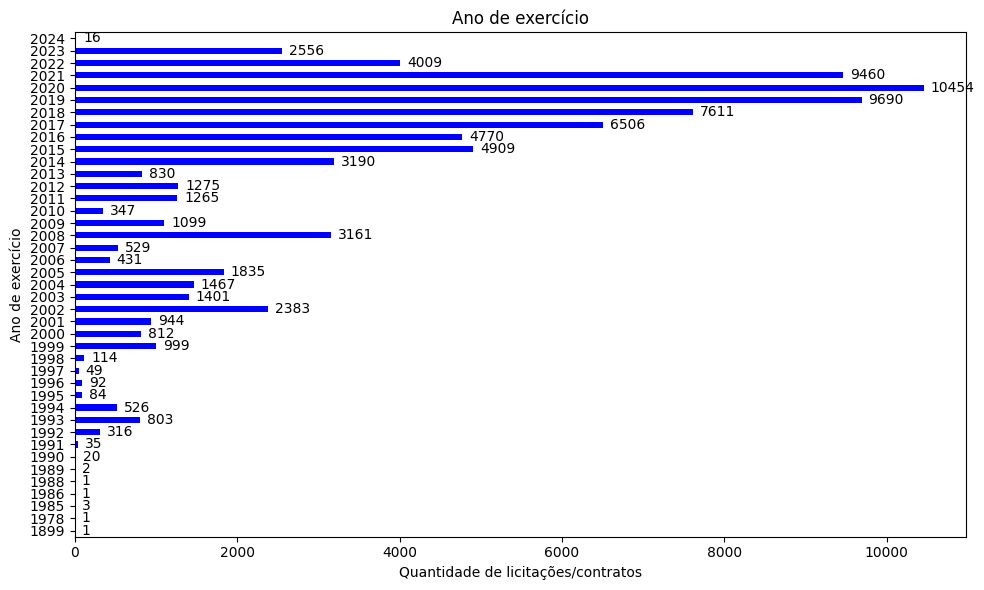

In [247]:
# Filtrando os dados com base no EXERCÍCIO (convertido para numérico para garantir a comparação correta)
dados_2024_tramitas = tabela_tramita[pd.to_numeric(tabela_tramita['EXERCÍCIO'], errors='coerce') <= 2024]

# Agrupando os dados por EXERCÍCIO e contando os PROTOCOLOS
dados_2024 = dados_2024_tramitas.groupby('EXERCÍCIO')['PROTOCOLO'].count()

# Criando o gráfico
fig, ax = plt.subplots(figsize=(10, 6))  # Ajuste do tamanho do gráfico
dados_2024.plot(kind='barh', ax=ax, color='blue')

# Configurando os rótulos dos eixos
ax.set_ylabel("Ano de exercício")
ax.set_xlabel("Quantidade de licitações/contratos")
ax.set_title("Ano de exercício")

# Adicionando os rótulos nas barras
for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.annotate(str(width), (width, p.get_y() + p.get_height() / 2.),
                    ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.savefig("grafico_licitações_por_ano_exercicio.jpeg", format="jpeg", dpi=300)


# Ajustes finais para layout
plt.tight_layout()
plt.show()

# 5. Estágio dos relatórios

In [248]:
estagio_dos_relatorios = tabela_tramita ['ESTÁGIO'].value_counts()
estagio_dos_relatorios = estagio_dos_relatorios.to_frame()
estagio_dos_relatorios.columns = ['Estágio dos relatórios']

estagio_dos_relatorios.to_excel("relatorios_por_estágio.xlsx", index=True)

estagio_dos_relatorios

,Estágio dos relatórios
ESTÁGIO,
Juntado,51282
Finalizado,20496
Formalizado,8365
Decisão Publicada,3108
Estoque - Relatório Inicial,182
Defesa apresentada,173
Com Parecer do MPjTCE,102
Agendado para Sessão,45
Com Cota do MPjTCE,39


# 6. Diferença entre ano de entrada e exercício

In [249]:
# Filtrar os protocolos onde EXERCÍCIO e ANO não são iguais
filtro = tabela_tramita[tabela_tramita['EXERCÍCIO'] != tabela_tramita['ANO ENTRADA']]

# Mostrar a quantidade total de relatórios com a diferença
quantidade_relatorios = filtro.shape[0]  # ou len(filtro)
print(f"Quantidade total de relatórios com a diferença de EXERCÍCIO e ANO: {quantidade_relatorios}")

Quantidade total de relatórios com a diferença de EXERCÍCIO e ANO: 83997


In [250]:
# Agrupar por diferença de anos e contar a quantidade de relatórios por 
filtro['DIFERENÇA_ANOS'] = filtro['ANO ENTRADA'] - filtro['EXERCÍCIO']
agrupado = filtro.groupby('DIFERENÇA_ANOS').size()

# Exibir a quantidade de relatórios por diferença de ano
print(agrupado)

DIFERENÇA_ANOS
-6        1
-1        4
0     77882
1      5174
2       514
3       190
4       118
5        70
6        21
7         9
8         1
9         1
10       10
13        1
93        1
Freq: Y-DEC, dtype: int64
